In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from math import factorial

In [4]:
m1ReflectanceFile = '../components/telescope/mirror1/m1ProtAlIdeal.dat'
m1LossFile = '../components/telescope/mirror1/m1Losses.dat'
m1File = '../components/telescope/m1Throughput.dat'
m2ReflectanceFile = '../components/telescope/mirror2/m2ProtAgIdeal.dat'
m2LossFile = '../components/telescope/mirror2/m2Losses.dat'
m2File = '../components/telescope/m2Throughput.dat'
m3ReflectanceFile = '../components/telescope/mirror3/m3ProtAlIdeal.dat'
m3LossFile = '../components/telescope/mirror3/m3Losses.dat'
m3File = '../components/telescope/m3Throughput.dat'
telescopeFile = '../components/telThroughput.dat'
componentsPlotFile = '../plots/telComponents.png'
telPlotFile = '../plots/telThroughput.png'

In [5]:
m1Ideal = np.loadtxt(m1ReflectanceFile)
m1Losses = np.loadtxt(m1LossFile)
m2Ideal = np.loadtxt(m2ReflectanceFile)
m2Losses = np.loadtxt(m2LossFile)
m3Ideal = np.loadtxt(m3ReflectanceFile)
m3Losses = np.loadtxt(m3LossFile)

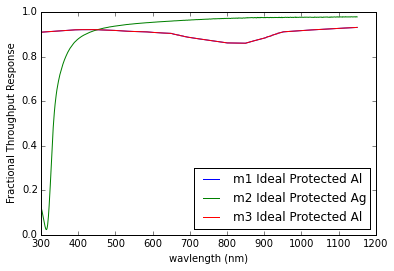

In [6]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(m1Ideal[:,0], m1Ideal[:,1], label='m1 Ideal Protected Al')
_ = plt.plot(m2Ideal[:,0], m2Ideal[:,1], label='m2 Ideal Protected Ag')
_ = plt.plot(m3Ideal[:,0], m3Ideal[:,1], label='m3 Ideal Protected Al')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

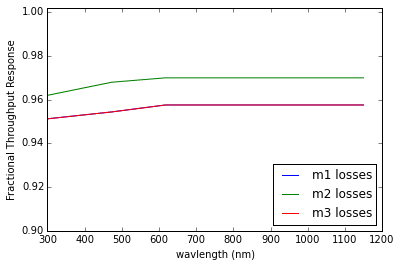

In [8]:
_ = plt.ylim([0.90, 1.002])
_ = plt.plot(m1Losses[:,0], m1Losses[:,1], label = 'm1 losses')
_ = plt.plot(m2Losses[:,0], m2Losses[:,1], label = 'm2 losses')
_ = plt.plot(m3Losses[:,0], m3Losses[:,1], label = 'm3 losses')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [9]:
m1Thru = m1Ideal[:,1] * m1Losses[:,1]
m2Thru = m2Ideal[:,1] * m2Losses[:,1]
m3Thru = m3Ideal[:,1] * m3Losses[:,1]
np.savetxt(m1File, zip(m1Ideal[:,0], m1Thru))
np.savetxt(m2File, zip(m1Ideal[:,0], m1Thru))
np.savetxt(m3File, zip(m1Ideal[:,0], m1Thru))

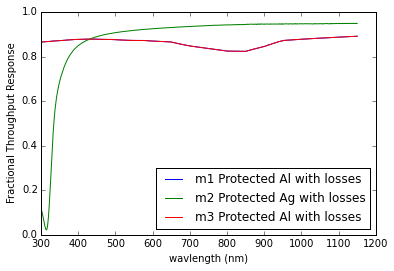

In [16]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(m1Ideal[:,0], m1Thru, label='m1 Protected Al with losses')
_ = plt.plot(m2Ideal[:,0], m2Thru, label='m2 Protected Ag with losses')
_ = plt.plot(m3Ideal[:,0], m3Thru, label='m3 Protected Al with losses')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')
plt.savefig(componentsPlotFile)

In [12]:
telThru = m1Thru * m2Thru * m3Thru

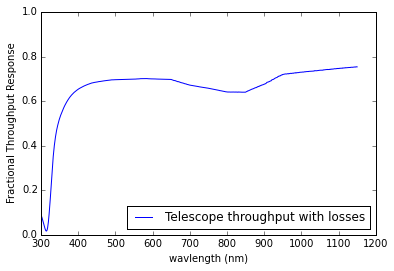

In [18]:
_ = plt.ylim([0.0, 1.002])
_ = plt.plot(m1Ideal[:,0], telThru, label='Telescope throughput with losses')
_ = plt.legend(loc='lower right')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')
plt.savefig(telPlotFile)

In [17]:
np.savetxt(telescopeFile, zip(m1Ideal[:,0], telThru))